# 🏦 Loan Default Prediction Model

This notebook demonstrates a complete machine learning pipeline for predicting loan defaults using XGBoost.

---

## 📋 Table of Contents
1. [Data Loading & Exploration](#data-loading)
2. [Data Preprocessing](#preprocessing)
3. [Model Training](#training)
4. [Model Evaluation](#evaluation)
5. [Deployment Files](#deployment)

---

## 📦 Import Libraries

In [1]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    confusion_matrix, 
    classification_report, 
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score
)
from imblearn.over_sampling import SMOTE
import pickle
import os
import warnings
warnings.filterwarnings('ignore')

print("✅ All libraries imported successfully")

✅ All libraries imported successfully


<a id='data-loading'></a>
## 📊 1. Data Loading & Exploration

In [2]:
# Load the dataset
df = pd.read_csv("Loan_default.csv")
print("📂 Dataset loaded successfully")
print(f"Shape: {df.shape}")
df.head()

📂 Dataset loaded successfully
Shape: (255347, 18)


,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [3]:
# Dataset information
print("=" * 60)
print("📋 DATASET INFORMATION")
print("=" * 60)
df.info()

📋 DATASET INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  o

In [4]:
# Statistical summary
print("=" * 60)
print("📊 STATISTICAL SUMMARY")
print("=" * 60)
df.describe()

📊 STATISTICAL SUMMARY


,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


⚖️ Imbalance in The Data


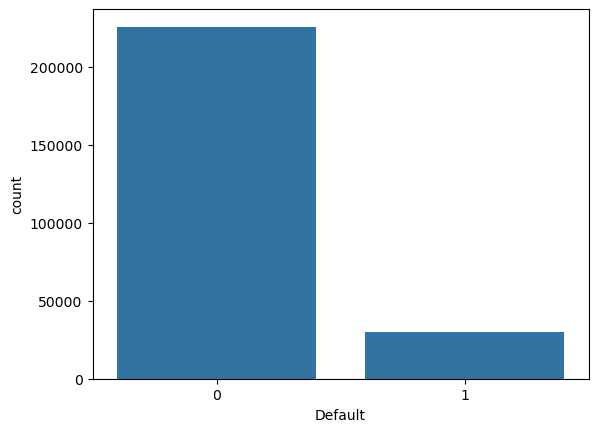

In [30]:
print("=" * 60)
print("⚖️ Imbalance in The Data")
print("=" * 60)
import seaborn as sns
import matplotlib.pyplot as plt 
sns.countplot(x='Default', data=df)
plt.show()

In [5]:
# Check for missing values
print("=" * 60)
print("🔍 MISSING VALUES CHECK")
print("=" * 60)
missing_values = df.isna().sum()
if missing_values.sum() == 0:
    print("✅ No missing values found")
else:
    print(missing_values[missing_values > 0])

🔍 MISSING VALUES CHECK
✅ No missing values found


In [6]:
# Check for duplicates
print("=" * 60)
print("🔍 DUPLICATE CHECK")
print("=" * 60)
duplicates = df.duplicated().sum()
print(f"Number of duplicates: {duplicates}")
if duplicates == 0:
    print("✅ No duplicates found")

🔍 DUPLICATE CHECK
Number of duplicates: 0
✅ No duplicates found


<a id='preprocessing'></a>
## 🔧 2. Data Preprocessing

In [7]:
# Drop LoanID column (not needed for prediction)
print("🗑️ Dropping LoanID column...")
df = df.drop(["LoanID"], axis=1)
print(f"✅ New shape: {df.shape}")

🗑️ Dropping LoanID column...
✅ New shape: (255347, 17)


In [8]:
# Encode categorical variables
print("=" * 60)
print("🔤 ENCODING CATEGORICAL VARIABLES")
print("=" * 60)

le = LabelEncoder()
categorical_cols = df.select_dtypes(include=['object']).columns

print(f"Categorical columns found: {list(categorical_cols)}")
print()

for col in categorical_cols:
    unique_values = df[col].nunique()
    df[col] = le.fit_transform(df[col])
    print(f"✅ Encoded '{col}' - {unique_values} unique values")

print(f"\n✅ All categorical columns encoded successfully")

🔤 ENCODING CATEGORICAL VARIABLES
Categorical columns found: ['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner']

✅ Encoded 'Education' - 4 unique values
✅ Encoded 'EmploymentType' - 4 unique values
✅ Encoded 'MaritalStatus' - 3 unique values
✅ Encoded 'HasMortgage' - 2 unique values
✅ Encoded 'HasDependents' - 2 unique values
✅ Encoded 'LoanPurpose' - 5 unique values
✅ Encoded 'HasCoSigner' - 2 unique values

✅ All categorical columns encoded successfully


In [9]:
# Separate features and target
print("=" * 60)
print("🎯 SEPARATING FEATURES AND TARGET")
print("=" * 60)

X = df.drop('Default', axis=1)
y = df['Default']

print(f"Features (X) shape: {X.shape}")
print(f"Target (y) shape: {y.shape}")
print(f"\nTarget distribution:")
print(y.value_counts())
print(f"\nClass balance: {y.value_counts(normalize=True).round(3).to_dict()}")

🎯 SEPARATING FEATURES AND TARGET
Features (X) shape: (255347, 16)
Target (y) shape: (255347,)

Target distribution:
Default
0    225694
1     29653
Name: count, dtype: int64

Class balance: {0: 0.884, 1: 0.116}


In [10]:
# Handle class imbalance using SMOTE
print("=" * 60)
print("⚖️ HANDLING CLASS IMBALANCE (SMOTE)")
print("=" * 60)

print(f"Before SMOTE: {X.shape}")
print(f"Class distribution: {dict(zip(*np.unique(y, return_counts=True)))}")

smote = SMOTE(random_state=42, sampling_strategy=0.5)
X, y = smote.fit_resample(X, y)

print(f"\nAfter SMOTE: {X.shape}")
print(f"Class distribution: {dict(zip(*np.unique(y, return_counts=True)))}")
print("✅ SMOTE applied successfully")

⚖️ HANDLING CLASS IMBALANCE (SMOTE)
Before SMOTE: (255347, 16)
Class distribution: {0: 225694, 1: 29653}


  File "c:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\ProgramData\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\ProgramData\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\ProgramData\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^



After SMOTE: (338541, 16)
Class distribution: {0: 225694, 1: 112847}
✅ SMOTE applied successfully


In [11]:
# Split data into train and test sets
print("=" * 60)
print("✂️ SPLITTING DATA")
print("=" * 60)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    stratify=y, 
    random_state=42
)

print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")
print("✅ Data split completed")

✂️ SPLITTING DATA
Training set: (270832, 16)
Test set: (67709, 16)
✅ Data split completed


<a id='training'></a>
## 🤖 3. Model Training

In [ ]:
# print("=" * 60)
# print("🚀 TRAINING RANDOMFOREST MODEL")
# print("=" * 60)

# rf = RandomForestClassifier(    
#     n_estimators=100, 
#     learning_rate=0.1, 
#     max_depth=10, 
#     random_state=42,
#     eval_metric='logloss'
#     )

# print("Training in progress...")
# rf.fit(X_train, y_train)
# print("✅ Model training completed!")

In [12]:
# Train XGBoost model
print("=" * 60)
print("🚀 TRAINING XGBOOST MODEL")
print("=" * 60)

xgb = XGBClassifier(
    n_estimators=100, 
    learning_rate=0.1, 
    max_depth=10, 
    random_state=42,
    eval_metric='logloss'
)

print("Training in progress...")
xgb.fit(X_train, y_train)
print("✅ Model training completed!")

🚀 TRAINING XGBOOST MODEL
Training in progress...
✅ Model training completed!


<a id='evaluation'></a>
## 📈 4. Model Evaluation

In [13]:
# Predictions
print("=" * 60)
print("🔮 MAKING PREDICTIONS")
print("=" * 60)

y_pred_train = xgb.predict(X_train)
y_pred_test = xgb.predict(X_test)

print("✅ Predictions completed")

🔮 MAKING PREDICTIONS
✅ Predictions completed


In [14]:
# Calculate accuracies
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

print("=" * 60)
print("🎯 MODEL ACCURACY")
print("=" * 60)
print(f"Train Accuracy: {accuracy_train * 100:.2f}%")
print(f"Test Accuracy:  {accuracy_test * 100:.2f}%")
print("=" * 60)

🎯 MODEL ACCURACY
Train Accuracy: 90.67%
Test Accuracy:  88.02%


In [15]:
# Classification report for training set
print("=" * 60)
print("📊 CLASSIFICATION REPORT - TRAINING SET")
print("=" * 60)
print(classification_report(y_train, y_pred_train))

📊 CLASSIFICATION REPORT - TRAINING SET
              precision    recall  f1-score   support

           0       0.89      0.98      0.93    180555
           1       0.95      0.76      0.84     90277

    accuracy                           0.91    270832
   macro avg       0.92      0.87      0.89    270832
weighted avg       0.91      0.91      0.90    270832



In [16]:
# Classification report for test set
print("=" * 60)
print("📊 CLASSIFICATION REPORT - TEST SET")
print("=" * 60)
print(classification_report(y_test, y_pred_test))

📊 CLASSIFICATION REPORT - TEST SET
              precision    recall  f1-score   support

           0       0.87      0.96      0.91     45139
           1       0.91      0.71      0.80     22570

    accuracy                           0.88     67709
   macro avg       0.89      0.84      0.86     67709
weighted avg       0.88      0.88      0.88     67709



In [17]:
# Confusion Matrix
print("=" * 60)
print("🔢 CONFUSION MATRIX - TEST SET")
print("=" * 60)
cm = confusion_matrix(y_test, y_pred_test)
print(cm)
print("\nFormat: [[TN, FP],")
print("         [FN, TP]]")

🔢 CONFUSION MATRIX - TEST SET
[[43507  1632]
 [ 6478 16092]]

Format: [[TN, FP],
         [FN, TP]]


<a id='deployment'></a>
## 📦 5. Deployment Files Generation

This section creates all necessary files for deploying the model with Streamlit.

In [18]:
# Create deployment directory
deployment_dir = "deployment"
os.makedirs(deployment_dir, exist_ok=True)

print("=" * 60)
print("📦 STARTING DEPLOYMENT FILES GENERATION")
print("=" * 60)

📦 STARTING DEPLOYMENT FILES GENERATION


In [19]:
# 1. Save model as JSON
model_path = os.path.join(deployment_dir, 'xgb_model.json')
xgb.save_model(model_path)
print(f"✅ Model saved: {model_path}")

✅ Model saved: deployment\xgb_model.json


In [20]:
# 2. Save feature names
feature_names = X.columns.tolist()
features_path = os.path.join(deployment_dir, 'feature_names.pkl')

with open(features_path, 'wb') as f:
    pickle.dump(feature_names, f)

print(f"✅ Feature names saved: {features_path}")
print(f"   Total features: {len(feature_names)}")
print(f"   Features: {', '.join(feature_names[:5])}...")

✅ Feature names saved: deployment\feature_names.pkl
   Total features: 16
   Features: Age, Income, LoanAmount, CreditScore, MonthsEmployed...


In [21]:
# 3. Save LabelEncoders
print("\n📋 Creating Label Encoders from original data...")

# Read original data
df_original = pd.read_csv("Loan_default.csv")
df_original = df_original.drop(["LoanID"], axis=1)

label_encoders = {}
categorical_columns = []

print("\nCategorical columns and their unique values:")
print("-" * 60)

for col in df_original.select_dtypes(include=['object']).columns:
    if col != 'Default':
        le_temp = LabelEncoder()
        le_temp.fit(df_original[col])
        label_encoders[col] = le_temp
        categorical_columns.append(col)
        print(f"  {col}: {list(le_temp.classes_)[:5]}...")

# Save Default encoder if needed
if 'Default' in df_original.columns and df_original['Default'].dtype == 'object':
    le_default = LabelEncoder()
    le_default.fit(df_original['Default'])
    label_encoders['Default'] = le_default
    print(f"  Default: {list(le_default.classes_)}")

encoders_path = os.path.join(deployment_dir, 'label_encoders.pkl')
with open(encoders_path, 'wb') as f:
    pickle.dump(label_encoders, f)

print(f"\n✅ Label encoders saved: {encoders_path}")
print(f"   Total encoders: {len(label_encoders)}")


📋 Creating Label Encoders from original data...

Categorical columns and their unique values:
------------------------------------------------------------
  Education: ["Bachelor's", 'High School', "Master's", 'PhD']...
  EmploymentType: ['Full-time', 'Part-time', 'Self-employed', 'Unemployed']...
  MaritalStatus: ['Divorced', 'Married', 'Single']...
  HasMortgage: ['No', 'Yes']...
  HasDependents: ['No', 'Yes']...
  LoanPurpose: ['Auto', 'Business', 'Education', 'Home', 'Other']...
  HasCoSigner: ['No', 'Yes']...

✅ Label encoders saved: deployment\label_encoders.pkl
   Total encoders: 7


In [22]:
# 4. Save model info
model_info = {
    'feature_names': feature_names,
    'categorical_columns': categorical_columns,
    'train_accuracy': float(accuracy_train),
    'test_accuracy': float(accuracy_test),
    'n_features': len(feature_names),
    'model_type': 'XGBoost Classifier',
    'sampling_strategy': 'SMOTE (0.5)'
}

info_path = os.path.join(deployment_dir, 'model_info.pkl')
with open(info_path, 'wb') as f:
    pickle.dump(model_info, f)

print(f"✅ Model info saved: {info_path}")

✅ Model info saved: deployment\model_info.pkl


In [23]:
# 5. Create app.py for Streamlit
app_code = '''import streamlit as st
import pandas as pd
import pickle
from xgboost import XGBClassifier

# Page configuration
st.set_page_config(
    page_title="Loan Default Prediction",
    page_icon="🏦",
    layout="wide"
)

# Load models and data
@st.cache_resource
def load_models():
    """Load all required models and data"""
    try:
        # Load XGBoost model
        model = XGBClassifier()
        model.load_model('xgb_model.json')
        
        # Load other files
        with open('feature_names.pkl', 'rb') as f:
            features = pickle.load(f)
        with open('label_encoders.pkl', 'rb') as f:
            encoders = pickle.load(f)
        with open('model_info.pkl', 'rb') as f:
            info = pickle.load(f)
        
        return model, features, encoders, info
    except Exception as e:
        st.error(f"Error loading model files: {str(e)}")
        st.stop()

# Load everything
model, feature_names, label_encoders, model_info = load_models()
st.success("✅ Model loaded successfully!")

# Main title
st.title('🏦 Loan Default Prediction System')
st.markdown('### Predict the likelihood of loan default based on applicant data')

# Sidebar - Model Information
with st.sidebar:
    st.header("📊 Model Information")
    st.metric("Train Accuracy", f"{model_info['train_accuracy']:.2%}")
    st.metric("Test Accuracy", f"{model_info['test_accuracy']:.2%}")
    st.markdown("---")
    st.info(f"**Features:** {len(feature_names)}")
    st.info(f"**Model:** {model_info.get('model_type', 'XGBoost')}")
    st.info(f"**Sampling:** {model_info.get('sampling_strategy', 'SMOTE')}")

st.markdown("---")
st.subheader("📝 Enter Loan Application Data")

# Initialize inputs
inputs = {}

# Separate features
categorical_features = list(label_encoders.keys())
if 'Default' in categorical_features:
    categorical_features.remove('Default')

numeric_features = [f for f in feature_names if f not in categorical_features]

# Numeric inputs
if numeric_features:
    st.markdown("#### 🔢 Numeric Information")
    cols = st.columns(3)
    
    for idx, feature in enumerate(numeric_features):
        with cols[idx % 3]:
            inputs[feature] = st.number_input(
                f"{feature}",
                value=0.0,
                help=f"Enter value for {feature}"
            )

# Categorical inputs
if categorical_features:
    st.markdown("---")
    st.markdown("#### 📋 Categorical Information")
    
    cols = st.columns(3)
    for idx, feature in enumerate(categorical_features):
        with cols[idx % 3]:
            possible_values = label_encoders[feature].classes_.tolist()
            possible_values = [v for v in possible_values if str(v) != 'nan']
            
            inputs[feature] = st.selectbox(
                f"{feature}",
                options=possible_values,
                help=f"Select {feature}"
            )

# Prediction button
st.markdown("---")
col1, col2, col3 = st.columns([1, 2, 1])

with col2:
    predict_button = st.button(
        '🔍 Predict Loan Default Risk',
        type='primary',
        use_container_width=True
    )

if predict_button:
    try:
        # Prepare input data
        input_data = pd.DataFrame([inputs])
        
        # Encode categorical features
        for col in categorical_features:
            if col in input_data.columns:
                input_data[col] = label_encoders[col].transform(input_data[col])
        
        # Ensure correct order
        input_data = input_data[feature_names]
        
        # Make prediction
        prediction = model.predict(input_data)[0]
        prediction_proba = model.predict_proba(input_data)[0]
        
        # Display results
        st.markdown("---")
        st.markdown("## 📊 Prediction Results")
        
        col1, col2, col3 = st.columns(3)
        
        with col1:
            st.markdown("### Status")
            if prediction == 1:
                st.error("### ⚠️ HIGH RISK")
                st.markdown("**Default Likely**")
            else:
                st.success("### ✅ LOW RISK")
                st.markdown("**Repayment Likely**")
        
        with col2:
            st.markdown("### No Default Probability")
            st.info(f"## {prediction_proba[0]:.1%}")
            st.progress(float(prediction_proba[0]))
        
        with col3:
            st.markdown("### Default Probability")
            st.warning(f"## {prediction_proba[1]:.1%}")
            st.progress(float(prediction_proba[1]))
        
        # Chart
        st.markdown("---")
        st.markdown("### 📈 Probability Distribution")
        
        chart_data = pd.DataFrame({
            'Status': ['No Default', 'Default'],
            'Probability': [prediction_proba[0] * 100, prediction_proba[1] * 100]
        })
        
        st.bar_chart(chart_data.set_index('Status'))
        
        # Recommendations
        st.markdown("---")
        st.markdown("### 💡 Recommendations")
        
        if prediction == 1:
            st.warning("""
            **⚠️ Warning - High Risk:**
            - High probability of loan default detected
            - Additional credit assessment recommended
            - May require additional guarantees or collateral
            - Consider rejecting application or offering modified terms
            """)
        else:
            st.success("""
            **✅ Positive Assessment - Low Risk:**
            - Good probability of successful repayment
            - Applicant appears qualified for the loan
            - Can proceed with standard approval procedures
            - Regular monitoring recommended
            """)
        
    except Exception as e:
        st.error(f"❌ Prediction error: {str(e)}")
        st.info("Please ensure all fields are filled correctly")

# Footer
st.markdown("---")
with st.expander("ℹ️ About This System"):
    st.markdown(f"""
    ### Loan Default Prediction System
    
    **Model Details:**
    - Algorithm: {model_info.get('model_type', 'XGBoost Classifier')}
    - Imbalance Handling: {model_info.get('sampling_strategy', 'SMOTE')}
    
    **Performance:**
    - Train Accuracy: {model_info['train_accuracy']:.2%}
    - Test Accuracy: {model_info['test_accuracy']:.2%}
    - Features: {len(feature_names)}
    
    **Features Used:**
    {', '.join(feature_names)}
    """)

st.markdown(
    """
    <div style='text-align: center; margin-top: 30px;'>
        <p style='color: #666;'>
            Developed with Streamlit | Powered by XGBoost<br>
            Machine Learning for Financial Risk Assessment
        </p>
    </div>
    """,
    unsafe_allow_html=True
)
'''

app_path = os.path.join(deployment_dir, 'app.py')
with open(app_path, 'w', encoding='utf-8') as f:
    f.write(app_code)

print(f"✅ Streamlit app created: {app_path}")

✅ Streamlit app created: deployment\app.py


In [24]:
# 6. Create requirements.txt
requirements = """streamlit==1.31.0
pandas==2.0.3
scikit-learn==1.3.0
xgboost==2.0.3
imbalanced-learn==0.11.0
numpy==1.24.3
"""

req_path = os.path.join(deployment_dir, 'requirements.txt')
with open(req_path, 'w') as f:
    f.write(requirements)

print(f"✅ Requirements file created: {req_path}")

✅ Requirements file created: deployment\requirements.txt


In [25]:
# 7. Create README.md
readme = f"""# 🏦 Loan Default Prediction System

A machine learning application for predicting loan defaults using XGBoost.

## 📊 Model Performance

- **Train Accuracy:** {accuracy_train:.2%}
- **Test Accuracy:** {accuracy_test:.2%}
- **Algorithm:** XGBoost Classifier
- **Features:** {len(feature_names)}

## 🚀 Quick Start

### Installation

1. Install dependencies:
```bash
pip install -r requirements.txt
```

2. Run the Streamlit app:
```bash
streamlit run app.py
```

3. Open your browser at `http://localhost:8501`

## 📁 Files

- `xgb_model.json` - Trained XGBoost model
- `feature_names.pkl` - List of feature names
- `label_encoders.pkl` - Encoders for categorical variables
- `model_info.pkl` - Model metadata and statistics
- `app.py` - Streamlit application
- `requirements.txt` - Python dependencies

## 🎯 Features

{', '.join(feature_names)}

## 📝 Usage

1. Enter loan application data in the web interface
2. Click "Predict Loan Default Risk"
3. View prediction results and recommendations

## 🛠️ Technical Details

- **Model:** XGBoost Classifier (n_estimators=100, max_depth=10)
- **Imbalance Handling:** SMOTE (sampling_strategy=0.5)
- **Train/Test Split:** 80/20 with stratification
- **Random State:** 42 (for reproducibility)

## 📄 License

This project is for educational purposes.
"""

readme_path = os.path.join(deployment_dir, 'README.md')
with open(readme_path, 'w', encoding='utf-8') as f:
    f.write(readme)

print(f"✅ README created: {readme_path}")

✅ README created: deployment\README.md


In [26]:
# Summary
print("\n" + "=" * 60)
print("✅ ALL DEPLOYMENT FILES CREATED SUCCESSFULLY!")
print("=" * 60)
print(f"\n📂 Deployment folder: {deployment_dir}")
print("\n📦 Created files:")
print("  1. xgb_model.json - Trained model")
print("  2. feature_names.pkl - Feature names")
print("  3. label_encoders.pkl - Label encoders")
print("  4. model_info.pkl - Model information")
print("  5. app.py - Streamlit application")
print("  6. requirements.txt - Dependencies")
print("  7. README.md - Documentation")
print("\n📊 Model Statistics:")
print(f"  • Train accuracy: {accuracy_train:.2%}")
print(f"  • Test accuracy: {accuracy_test:.2%}")
print(f"  • Number of features: {len(feature_names)}")
print(f"  • Categorical features: {len(categorical_columns)}")
print("\n🚀 Ready for deployment!")
print("\n💡 To run the app:")
print(f"   cd {deployment_dir}")
print("   streamlit run app.py")


✅ ALL DEPLOYMENT FILES CREATED SUCCESSFULLY!

📂 Deployment folder: deployment

📦 Created files:
  1. xgb_model.json - Trained model
  2. feature_names.pkl - Feature names
  3. label_encoders.pkl - Label encoders
  4. model_info.pkl - Model information
  5. app.py - Streamlit application
  6. requirements.txt - Dependencies
  7. README.md - Documentation

📊 Model Statistics:
  • Train accuracy: 90.67%
  • Test accuracy: 88.02%
  • Number of features: 16
  • Categorical features: 7

🚀 Ready for deployment!

💡 To run the app:
   cd deployment
   streamlit run app.py


---
## 🎉 Notebook Complete!

All model training and deployment files have been generated successfully.

### Next Steps:
1. Navigate to the `deployment` folder
2. Install dependencies: `pip install -r requirements.txt`
3. Run the app: `streamlit run app.py`

---